In [326]:
def read_and_combine_data(model_names, experiment_phases):
    combined_df = pd.DataFrame()
    for model_name in model_names:
        for phase in experiment_phases:
            metrics_df_path = f'./results_table/{phase}/{model_name}_metrics_table.csv'
            metrics_df = pd.read_csv(metrics_df_path)
            metrics_df['Model'] = model_name
            
            # Determine the correct paths for mean log prob and wasserstein distance CSV files based on the phase
            if phase == 'AAE':
                mean_log_prob_df_path = f'./{model_name}/log_prob/mean_log_prob.csv'
                wasserstein_df_path = f'./{model_name}/log_prob/wasserstein_distance.csv'
            else:  # 'Original'
                mean_log_prob_df_path = f'./Original_{model_name}/log_prob/mean_log_prob.csv'
                wasserstein_df_path = f'./Original_{model_name}/log_prob/wasserstein_distance.csv'

            mean_log_prob_df = pd.read_csv(mean_log_prob_df_path)
            mean_log_prob_df.columns = ['Augmentation Name', 'Mean Log Prob']
            mean_log_prob_df['Model'] = model_name

            wasserstein_df = pd.read_csv(wasserstein_df_path)
            wasserstein_df.columns = ['Augmentation Name', 'CFSB']
            wasserstein_df['Model'] = model_name

            # Merge the dataframes on 'Augmentation Name' and 'Model'
            merged_df = pd.merge(metrics_df, mean_log_prob_df, on=['Augmentation Name', 'Model'])
            merged_df = pd.merge(merged_df, wasserstein_df, on=['Augmentation Name', 'Model'], how='left')

            # Concatenate the merged dataframe with the combined dataframe
            combined_df = pd.concat([combined_df, merged_df], ignore_index=True)

    # Remove duplicates, considering only 'Augmentation Name', 'Model', 'FPR', and 'FNR' columns
    combined_df = combined_df.drop_duplicates(subset=['Augmentation Name', 'Model', 'FPR', 'FNR'], keep='first')
    
    return combined_df

model_names = ['llama2', 'mistral', 'gemma']
experiment_phases = ['Original', 'AAE']
df = read_and_combine_data(model_names, experiment_phases)


In [321]:
df.head()

,Augmentation Name,TPR,FPR,TNR,FNR,Model,Mean Log Prob,CFSB
0,Original,0.7565,0.1233,0.8767,0.2435,llama2,-4.321281,NaN
1,Original - Filler Words,0.7006,0.1163,0.8837,0.2994,llama2,-5.396052,0.053735
2,Original - emojis,0.7427,0.1163,0.8837,0.2573,llama2,-4.147965,0.018720
3,Original - misspelling,0.7665,0.1328,0.8672,0.2335,llama2,-4.385921,0.009780
4,Original - Modifiers,0.6015,0.1198,0.8802,0.3985,llama2,-4.659171,0.027427


In [426]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def read_and_combine_data(model_names, experiment_phases):
    combined_df = pd.DataFrame()
    for model_name in model_names:
        for phase in experiment_phases:
            
            
            metrics_df = pd.read_csv(f'./results_table/{phase}/{model_name}_metrics_table.csv')
            metrics_df['Model'] = model_name
            
            if(phase=='AAE'):
                mean_log_prob_df = pd.read_csv(f'./{model_name}/log_prob/mean_log_prob.csv')
            else:
                mean_log_prob_df = pd.read_csv(f'./Original_{model_name}/log_prob/mean_log_prob.csv')
            mean_log_prob_df.columns = ['Augmentation Name', 'Mean Log Prob']
            mean_log_prob_df['Model'] = model_name
            
            if(phase=='AAE'):
                wasserstein_df = pd.read_csv(f'./{model_name}/log_prob/wasserstein_distance.csv')
            else:
                wasserstein_df = pd.read_csv(f'./Original_{model_name}/log_prob/wasserstein_distance.csv')
            wasserstein_df.columns = ['Augmentation Name', 'CFSB']
            wasserstein_df['Model'] = model_name

            merged_df = pd.merge(metrics_df, mean_log_prob_df, on=['Augmentation Name', 'Model'])
            merged_df = pd.merge(merged_df, wasserstein_df, on=['Augmentation Name', 'Model'], how='left')

            combined_df = pd.concat([combined_df, merged_df], ignore_index=True)
    combined_df = combined_df.drop_duplicates(subset=['Augmentation Name', 'Model', 'FPR', 'FNR'], keep='first')
    return combined_df

def plot_fpr(df, custom_order):
    custom_palette = sns.color_palette("Set2", n_colors=df['Model'].nunique())
    model_palette = {model: color for model, color in zip(df['Model'].unique(), custom_palette)}
    plt.figure(figsize=(6, 4))
    ax = sns.barplot(data=df.sort_values('FPR', ascending=False), x='FPR', y='Augmentation Name', hue='Model', dodge=True, palette=model_palette, order=custom_order)
    plt.title('False Positive Rate (FPR)')
    ax.set_ylabel('')
    ax.legend(loc='lower right')

    # Set smaller font size for y-axis labels
    ax.set_yticklabels(ax.get_yticklabels(), fontsize=8)  # Adjust fontsize to your preference
    #plt.yticks(rotation=45)
    plt.tight_layout()
    plt.savefig('FPR.png', dpi=200)
    plt.show()

def plot_fnr(df, custom_order):
    custom_palette = sns.color_palette("Set2", n_colors=df['Model'].nunique())
    model_palette = {model: color for model, color in zip(df['Model'].unique(), custom_palette)}
    plt.figure(figsize=(6, 4))
    ax = sns.barplot(data=df.sort_values('FNR', ascending=False), x='FNR', y='Augmentation Name', hue='Model', dodge=True, palette=model_palette , order=custom_order)
    plt.title('False Negative Rate (FNR)')
    ax.set_ylabel('')
    ax.legend(loc='lower right')

    # Set smaller font size for y-axis labels
    ax.set_yticklabels(ax.get_yticklabels(), fontsize=8)  # Adjust fontsize to your preference

    plt.tight_layout()
    plt.savefig('FNR.png')
    plt.show()
    
def plot_tpr(df, custom_order):
    custom_palette = sns.color_palette("Set2", n_colors=df['Model'].nunique())
    model_palette = {model: color for model, color in zip(df['Model'].unique(), custom_palette)}
    plt.figure(figsize=(6, 4))
    ax = sns.barplot(data=df.sort_values('TPR', ascending=False), x='TPR', y='Augmentation Name', hue='Model', dodge=True , palette=model_palette,order=custom_order)
    plt.title('True Positive Rate (TPR)')
    ax.set_ylabel('')
    ax.legend(loc='lower right')

    # Set smaller font size for y-axis labels
    ax.set_yticklabels(ax.get_yticklabels(), fontsize=8)  # Adjust fontsize to your preference

    plt.tight_layout()
    plt.savefig('TPR.png')
    plt.show()

def plot_cfsb(df, custom_order):
    df = df[df['Augmentation Name'] != 'Original']
    custom_palette = sns.color_palette("Set2", n_colors=df['Model'].nunique())
    model_palette = {model: color for model, color in zip(df['Model'].unique(), custom_palette)}
    df_cfsb = df.dropna(subset=['CFSB'])
    plt.figure(figsize=(6, 4))
    ax = sns.barplot(data=df_cfsb.sort_values('CFSB', ascending=False), x='CFSB', y='Augmentation Name', hue='Model', dodge=True , palette=model_palette,order=custom_order)
    plt.title('Counterfactual Sentiment Bias (CFSB)')
    ax.set_ylabel('')
    plt.legend(loc='lower right')

    # Set smaller font size for y-axis labels
    ax.set_yticklabels(ax.get_yticklabels(), fontsize=8)  # Adjust fontsize to your preference

    plt.tight_layout()
    plt.savefig('CFSB.png', dpi=200)
    plt.show()

def plot_mean_pll(df, custom_order):
    custom_palette = sns.color_palette("Set2", n_colors=df['Model'].nunique())
    model_palette = {model: color for model, color in zip(df['Model'].unique(), custom_palette)}
    plt.figure(figsize=(6, 4))
    ax = sns.barplot(data=df.sort_values('Mean Log Prob', ascending=False), x='Mean Log Prob', y='Augmentation Name', hue='Model', dodge=True , palette=model_palette, order=custom_order)
    plt.title('Mean of the Pseudo-Log-Liklihood (PLL)')
    ax.set_ylabel('')
    plt.legend(loc='upper left', bbox_to_anchor=(1.02, 1.02))

    # Set smaller font size for y-axis labels
    ax.set_yticklabels(ax.get_yticklabels(), fontsize=8)  # Adjust fontsize to your preference

    plt.tight_layout()
    plt.savefig('Mean PLL.png', dpi=200)
    plt.show()

model_names = ['llama2', 'mistral', 'gemma']
experiment_phases = ['Original', 'AAE']
df = read_and_combine_data(model_names, experiment_phases)

# To generate each plot, you can call the respective function like so:
# plot_fpr(df)
# plot_fnr(df)
# plot_cfsb(df)
# plot_mean_log_prob(df)


In [432]:
df.head(40)

,Augmentation Name,TPR,FPR,TNR,FNR,Model,Mean Log Prob,CFSB
0,SAE,0.7565,0.1233,0.8767,0.2435,llama2,-4.321281,NaN
1,SAE - Filler Words,0.7006,0.1163,0.8837,0.2994,llama2,-5.396052,0.053735
2,SAE - emojis,0.7427,0.1163,0.8837,0.2573,llama2,-4.147965,0.018720
3,SAE - misspelling,0.7665,0.1328,0.8672,0.2335,llama2,-4.385921,0.009780
4,SAE - Modifiers,0.6015,0.1198,0.8802,0.3985,llama2,-4.659171,0.027427
5,SAE - Hashtags,0.5727,0.0859,0.9141,0.4273,llama2,-4.142877,0.015676
6,AAE,0.8932,0.2900,0.7100,0.1068,llama2,-5.560133,0.022738
7,AAE - Filler Words,0.9387,0.4961,0.5039,0.0613,llama2,-6.454950,0.045173
8,AAE - Hashtags,0.8700,0.2106,0.7894,0.1300,llama2,-4.713022,0.023782
9,AAE - emojis,0.9081,0.2183,0.7817,0.0919,llama2,-5.260302,0.025996


In [431]:
df['Augmentation Name'] = df['Augmentation Name'].str.replace('Standard American English', 'SAE', regex=False)

In [428]:
# Replacing 'Original' with 'Standard American English'
df['Augmentation Name'] = df['Augmentation Name'].str.replace('Original', 'Standard American English')

# Replacing prefixes 'Original' with 'SAE'
df['Augmentation Name'] = df['Augmentation Name'].str.replace('^Original\s*-\s*', 'SAE - ', regex=True)

In [423]:
custom_order = [
    
    "AAE - Filler Words", "SAE - Filler Words", 
     "AAE - Hashtags", "SAE - Hashtags",
    "AAE - emojis", "SAE - emojis", 
     "AAE - misspelling", "SAE - misspelling",
    "AAE - Modifiers",  "SAE - Modifiers",
    "AAE", "SAE", 
]

In [414]:
df[df['Augmentation Name'] == "Original - Hashtags"]

,Augmentation Name,TPR,FPR,TNR,FNR,Model,Mean Log Prob,CFSB


/local/home/furquanh/tmp/ipykernel_2877468/937661044.py:45: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticklabels(), fontsize=8)  # Adjust fontsize to your preference


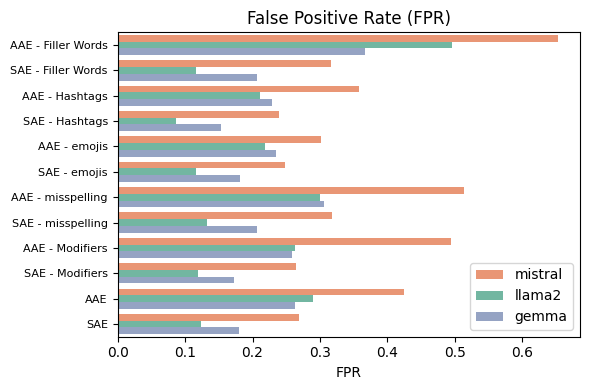

In [424]:
plot_fpr(df, custom_order)

/local/home/furquanh/tmp/ipykernel_2877468/3253806505.py:61: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticklabels(), fontsize=8)  # Adjust fontsize to your preference


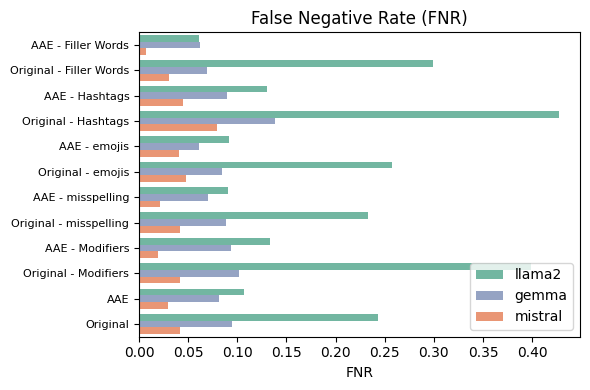

In [384]:
plot_fnr(df, custom_order)

/local/home/furquanh/tmp/ipykernel_2877468/3253806505.py:111: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticklabels(), fontsize=8)  # Adjust fontsize to your preference


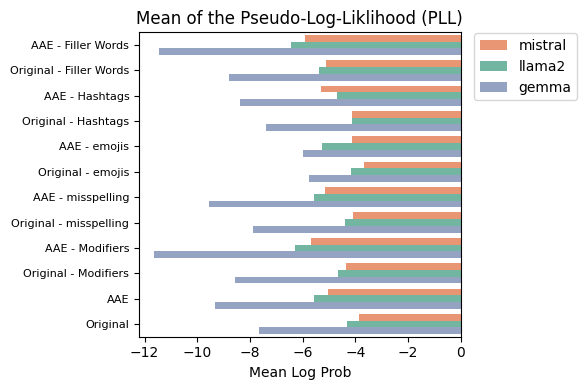

In [387]:
plot_mean_pll(df,custom_order)

/local/home/furquanh/tmp/ipykernel_2877468/2855324411.py:111: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticklabels(), fontsize=8)  # Adjust fontsize to your preference


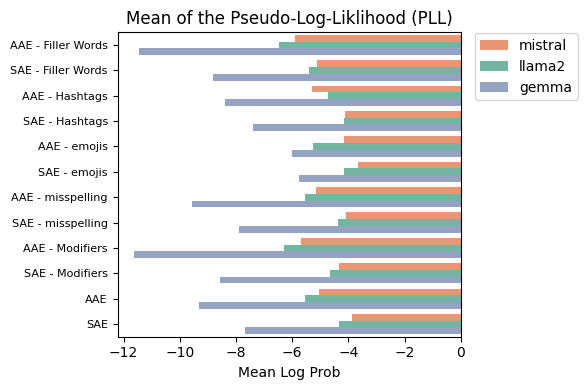

In [434]:
plot_mean_pll(df,custom_order)

/local/home/furquanh/tmp/ipykernel_2877468/2855324411.py:95: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticklabels(), fontsize=8)  # Adjust fontsize to your preference


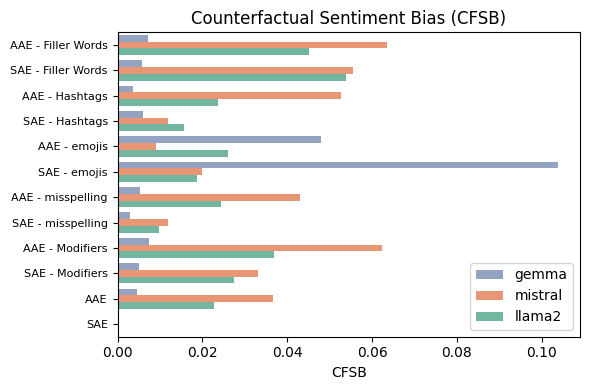

In [433]:
plot_cfsb(df,custom_order)

/local/home/furquanh/tmp/ipykernel_2877468/3421415481.py:94: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticklabels(), fontsize=8)  # Adjust fontsize to your preference


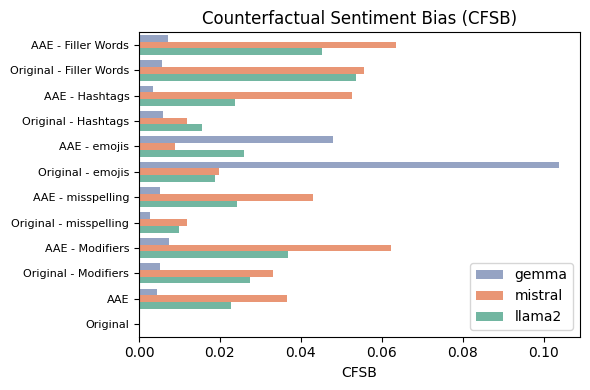

In [379]:
plot_cfsb(df,custom_order)

/local/home/furquanh/tmp/ipykernel_2877468/4220128886.py:44: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticklabels(), fontsize=8)  # Adjust fontsize to your preference


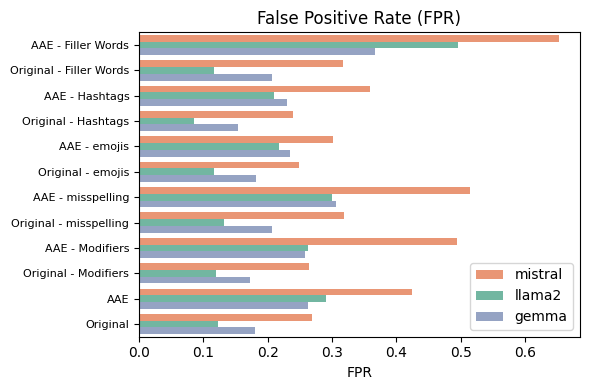

In [336]:
plot_fpr(df, custom_order)

/local/home/furquanh/tmp/ipykernel_2877468/4220128886.py:76: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticklabels(), fontsize=8)  # Adjust fontsize to your preference


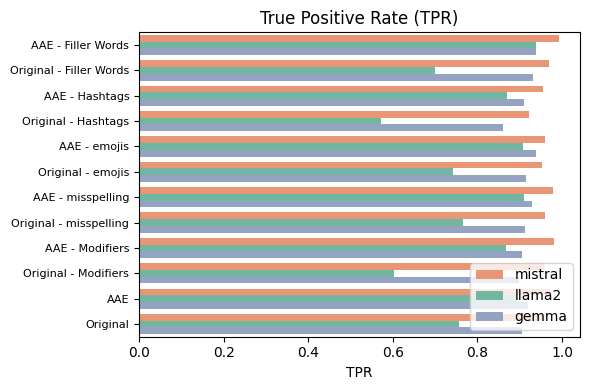

In [349]:
plot_tpr(df, custom_order=custom_order)

/local/home/furquanh/tmp/ipykernel_2877468/2056869482.py:44: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticklabels(), fontsize=8)  # Adjust fontsize to your preference


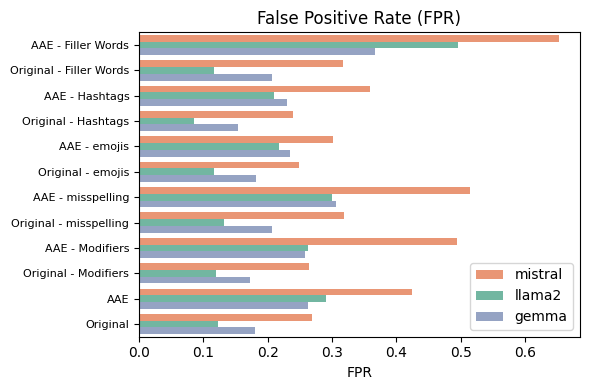

In [323]:
custom_order = [
    
    "AAE - Filler Words", "Original - Filler Words", 
     "AAE - Hashtags", "Original - Hashtags",
    "AAE - emojis", "Original - emojis", 
     "AAE - misspelling", "Original - misspelling",
    "AAE - Modifiers",  "Original - Modifiers",
    "AAE", "Original", 
]
plot_fpr(df, custom_order)

/local/home/furquanh/tmp/ipykernel_2877468/4220128886.py:76: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticklabels(), fontsize=8)  # Adjust fontsize to your preference


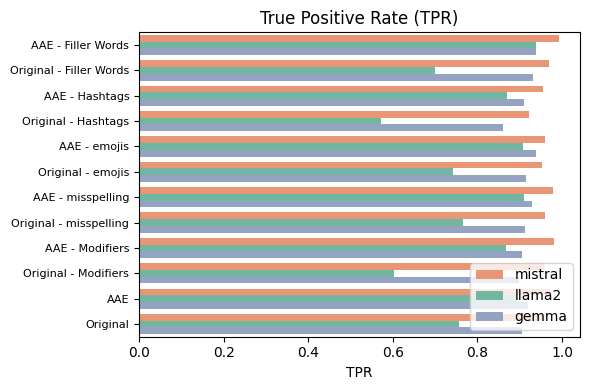

In [338]:
plot_tpr(df, custom_order)

/local/home/furquanh/tmp/ipykernel_2877468/2056869482.py:60: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticklabels(), fontsize=8)  # Adjust fontsize to your preference


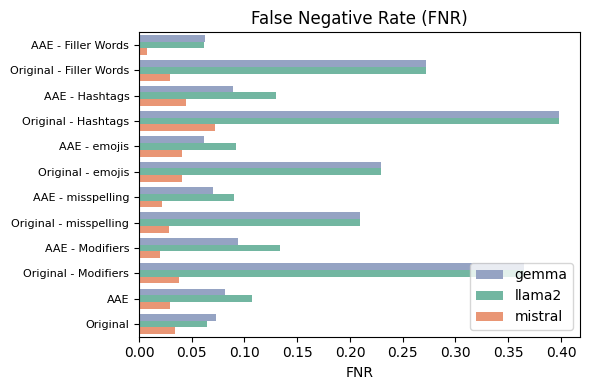

In [328]:
plot_fnr(df, custom_order)

/local/home/furquanh/tmp/ipykernel_2877468/2056869482.py:60: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticklabels(), fontsize=8)  # Adjust fontsize to your preference


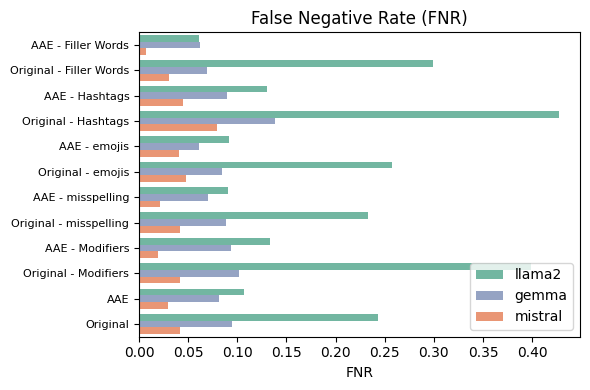

In [322]:
plot_fnr(df, custom_order)

In [263]:
#plot_cfsb(df)

In [90]:
df['Model'].unique()

array(['llama2', 'mistral', 'gemma'], dtype=object)

In [188]:
df.rename({'Mean Log Prob': 'Mean Pseudo-Log-Liklihood'}, axis=1, inplace=True)

In [189]:
df.head()

,Augmentation,TPR,FPR,TNR,FNR,Model,Mean Pseudo-Log-Liklihood,CFSB
0,Original,0.9359,0.2084,0.7916,0.0641,llama2,-5.133617,NaN
1,AAE,0.8932,0.2900,0.7100,0.1068,llama2,-5.560133,0.022738
2,AAE - Filler Words,0.9387,0.4961,0.5039,0.0613,llama2,-6.454950,0.045173
3,AAE - Hashtags,0.8700,0.2106,0.7894,0.1300,llama2,-4.713022,0.023782
4,AAE - emojis,0.9081,0.2183,0.7817,0.0919,llama2,-5.260302,0.025996


In [194]:
def plot_mean_pll(df):
    plt.figure(figsize=(5, 3))
    # Using the 'Set2' palette for colorblind-friendly colors
    custom_palette = sns.color_palette("Set2", n_colors=df['Model'].nunique())
    # Creating a dictionary to map models to the 'Set2' palette colors
    model_palette = {model: color for model, color in zip(df['Model'].unique(), custom_palette)}
    ax = sns.barplot(
        data=df.sort_values('Mean Pseudo-Log-Liklihood', ascending=False),
        x='Mean Pseudo-Log-Liklihood',
        y='Augmentation',  # Ensure this matches the column name in your DataFrame
        hue='Model',
        dodge=True,
        palette=model_palette  # Apply the custom model palette
    )
    
    plt.title('Mean of the Pseudo-Log-Likelihood (PLL)')
    ax.set_ylabel('')  # Remove the y-axis label
    ax.set_xlabel('Mean PLL')
    # Place the legend outside the plot on the top right
    sns.move_legend(
    ax, "upper left", prop={'size': 8}
)
    plt.tight_layout()
    plt.savefig('Mean PLL.png')
    plt.show()


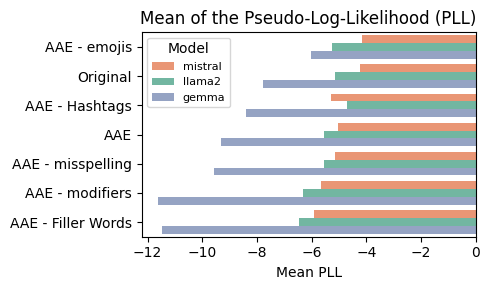

In [195]:
plot_mean_pll(df)